Clustering is the task of dividing the population or data points into a number of groups such that data points in the
same groups are more similar to other data points in the same group and dissimilar to the data points in other groups.

How does the K-Means Algorithm Work?

The working of the K-Means algorithm is explained in the below steps:

 Step-1: Select the number K to decide the number of clusters.

 Step-2: Select random K points or centroids.

 Step-3: Assign each data point to their closest centroid, which will form the predefined K clusters.

 Step-4: Calculate the variance and place a new centroid of each cluster.

 Step-5: Repeat the third steps, which means reassign each data point to the new closest centroid of each
cluster.

 Step-6: If any reassignment occurs, then go to step-4 else go to FINISH.

 Step-7: The model is ready.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly
from sklearn.cluster import KMeans

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('./DataSet/mall customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.drop('CustomerID',axis=1,inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [4]:
df.rename(columns={'Annual Income (k$)':'income','Age':'age','Spending Score (1-100)':'score'},inplace=True)
df.head()

,Gender,age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


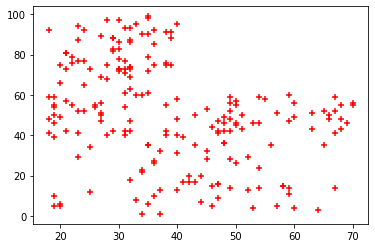

In [5]:
plt.scatter(df.age,df.score,color='red',marker='+')

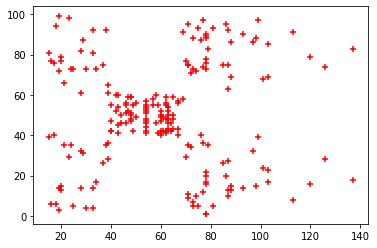

In [6]:
plt.scatter(df.income,df.score,color='red',marker='+')

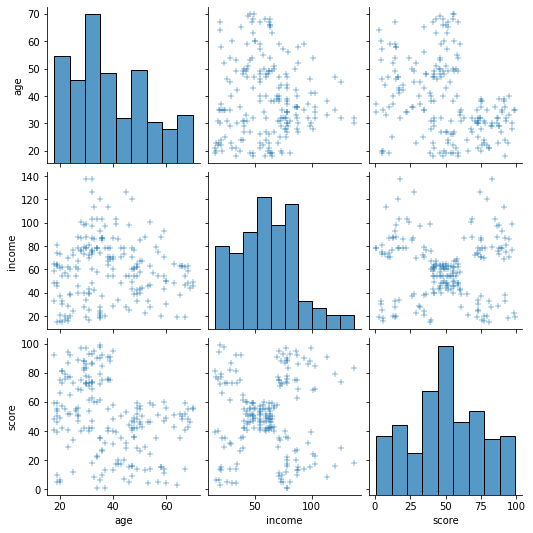

In [7]:
sns.pairplot(df[['age','income','score']],markers='+')

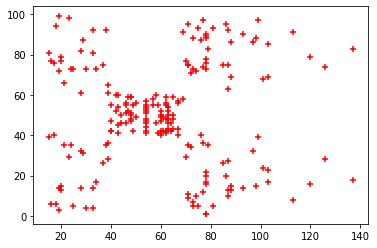

In [8]:
plt.scatter(df.income,df.score,color='red',marker='+')

In [9]:
#ignore the 
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=0.20)
#dorkar nai

In [10]:
import sklearn.cluster as cls

kmean1 = cls.KMeans()

In [11]:
kmean1.fit(df[['income','score']])

KMeans()

In [12]:
kmean1.predict(df[['income','score']])
# or
# kmean1.fit_predict(df[['income','score']])

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 4, 4,
       0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 1, 4, 4, 4, 4, 4,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 5, 2, 5, 2,
       1, 2, 5, 2, 5, 2, 5, 2, 5, 2, 1, 2, 5, 2, 1, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 5, 2, 1, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7,
       6, 7])

In [13]:
df['predicted cluster'] = kmean1.predict(df[['income','score']])
df.head()

,Gender,age,income,score,predicted cluster
0,Male,19,15,39,0
1,Male,21,15,81,3
2,Female,20,16,6,0
3,Female,23,16,77,3
4,Female,31,17,40,0


In [14]:
df.tail()

,Gender,age,income,score,predicted cluster
195,Female,35,120,79,7
196,Female,45,126,28,6
197,Male,32,126,74,7
198,Male,32,137,18,6
199,Male,30,137,83,7


In [15]:
center1=kmean1.cluster_centers_
center1

array([[ 25.72727273,  20.22727273],
       [ 63.95238095,  46.21428571],
       [ 78.55172414,  82.17241379],
       [ 25.0952381 ,  80.04761905],
       [ 47.65909091,  51.61363636],
       [ 80.18181818,  12.68181818],
       [109.7       ,  22.        ],
       [109.7       ,  82.        ]])

### vizualisation

In [16]:
df0=df[df['predicted cluster']==0]
df1=df[df['predicted cluster']==1]
df2=df[df['predicted cluster']==2]
df3=df[df['predicted cluster']==3]
df4=df[df['predicted cluster']==4]
df5=df[df['predicted cluster']==5]
df6=df[df['predicted cluster']==6]
df7=df[df['predicted cluster']==7]

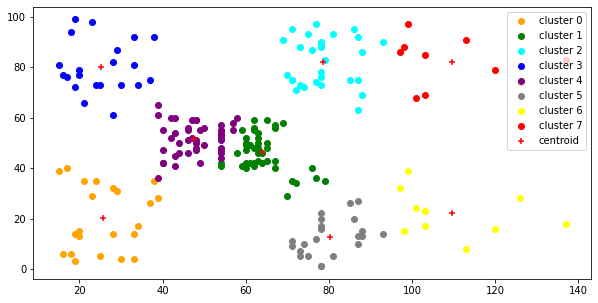

In [17]:
plt.figure(figsize=(10,5))
plt.scatter(df0['income'],df0['score'],color='orange',label='cluster 0')
plt.scatter(df1['income'],df1['score'],color='green',label='cluster 1')
plt.scatter(df2['income'],df2['score'],color='cyan',label='cluster 2')
plt.scatter(df3['income'],df3['score'],color='blue',label='cluster 3')
plt.scatter(df4['income'],df4['score'],color='purple',label='cluster 4')
plt.scatter(df5['income'],df5['score'],color='gray',label='cluster 5')
plt.scatter(df6['income'],df6['score'],color='yellow',label='cluster 6')
plt.scatter(df7['income'],df7['score'],color='red',label='cluster 7')

plt.scatter(center1[:,0],center1[:,1],color='red',marker='+',label='centroid')

plt.legend()

# Tuning

### Elbow Method in K-Means Clustering

In [18]:
from sklearn.cluster import KMeans
k_range=range(1,16)

wcss=[]
for k in k_range: 
    km=KMeans(n_clusters=k)
    km.fit(df[['score','income']])
    wcss.append(km.inertia_)
wcss

[269981.28,
 181363.595959596,
 106348.37306211119,
 73679.78903948837,
 44448.45544793371,
 37271.8862365895,
 30241.343617936585,
 25349.951971798004,
 21900.341350107527,
 19634.55462934998,
 17932.538148137086,
 15802.182179960835,
 14343.354592792828,
 13225.730414193651,
 12001.891761936035]

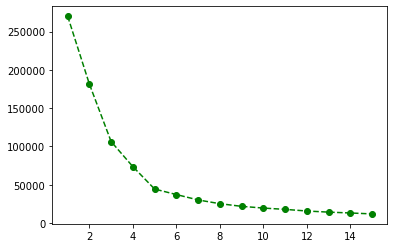

In [19]:
plt.plot(k_range,wcss,'go--')

In [20]:
from kneed import KneeLocator

In [21]:
kne=KneeLocator(k_range,wcss,curve='convex',direction='decreasing')

In [22]:
kne.knee

5

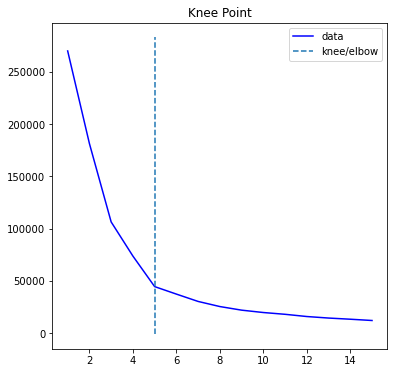

In [23]:
kne.plot_knee()

# K=5,CLUSTER=5

In [24]:
kmean2=cls.KMeans(n_clusters=5)
kmean2

KMeans(n_clusters=5)

In [25]:
df['new_clusters']=kmean2.fit_predict(df[['income','score']])

In [26]:
df.head()

,Gender,age,income,score,predicted cluster,new_clusters
0,Male,19,15,39,0,4
1,Male,21,15,81,3,2
2,Female,20,16,6,0,4
3,Female,23,16,77,3,2
4,Female,31,17,40,0,4


In [27]:
center2=kmean2.cluster_centers_
center2

array([[86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [28]:
df0=df[df['new_clusters']==0]
df1=df[df['new_clusters']==1]
df2=df[df['new_clusters']==2]
df3=df[df['new_clusters']==3]
df4=df[df['new_clusters']==4]

In [29]:
center2

array([[86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

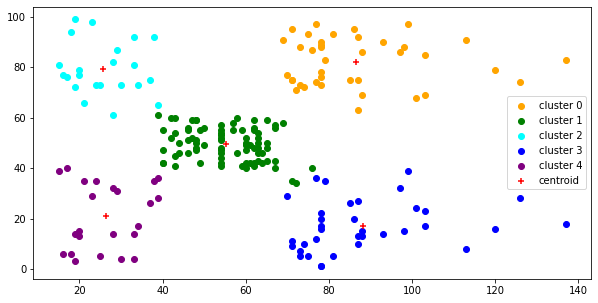

In [30]:
plt.figure(figsize=(10,5))
plt.scatter(df0['income'],df0['score'],color='orange',label='cluster 0')
plt.scatter(df1['income'],df1['score'],color='green',label='cluster 1')
plt.scatter(df2['income'],df2['score'],color='cyan',label='cluster 2')
plt.scatter(df3['income'],df3['score'],color='blue',label='cluster 3')
plt.scatter(df4['income'],df4['score'],color='purple',label='cluster 4')

plt.scatter(center2[:,0],center2[:,1],color='red',marker='+',label='centroid')

plt.legend()

In [31]:
kmean2.predict([[14,40]])

array([4])